## Invisible Work: Quantifying Midfield Impact Runs

In [1]:
import os

from src.data_loading.load_data import load_matches
from src.analysis.exploratory import a_obr_per_subtype, a_obr_per_subtype_per_phase
from src.analysis.radar_plots import a_obr_per_subtype_per_team, a_obr_per_subtype_per_player
from src.analysis.def_density_change import a_ddc_distance_player
from src.analysis.space_created import a_space_created
from src.analysis.xthreat import a_xthreat_per_run_group
from src.obr_new_profiles import a_obr_new_profiles

In [2]:
data_path = os.path.join(os.getcwd(), "src/data")
all_tracking, dynamic_events_all, all_metadata = load_matches(data_path)

DeserializationError: Could not determine raw data format

Football analysis has traditionally focused on on-ball events such as passes, shots, and carries. However, during a football match, a large number of actions take place without the ball that influence players’ decisions, team dynamics, and ultimately the outcome of the game. One crucial component of this off-ball behaviour is **player movement**.

Off-ball runs serve multiple tactical purposes: they create space, help players get free from opponents, disrupt defensive structures, and provide passing options for the player in possession. Although these actions are often not directly rewarded with the ball, they can have a significant impact on how attacking sequences develop.

As shown in Figure 1, players perform more than **456** off-ball runs per 90 minutes on average, with approximately **64%** of these runs remaining untargeted. This highlights that the majority of player movement occurs without direct ball involvement, yet still represents a substantial part of the game that should not be overlooked.

This project focuses on the analysis of off-ball runs performed by midfielders. Rather than only quantifying the volume of runs, it aims to evaluate their quality, assessing how different types of movement contribute to team performance and attacking potential.

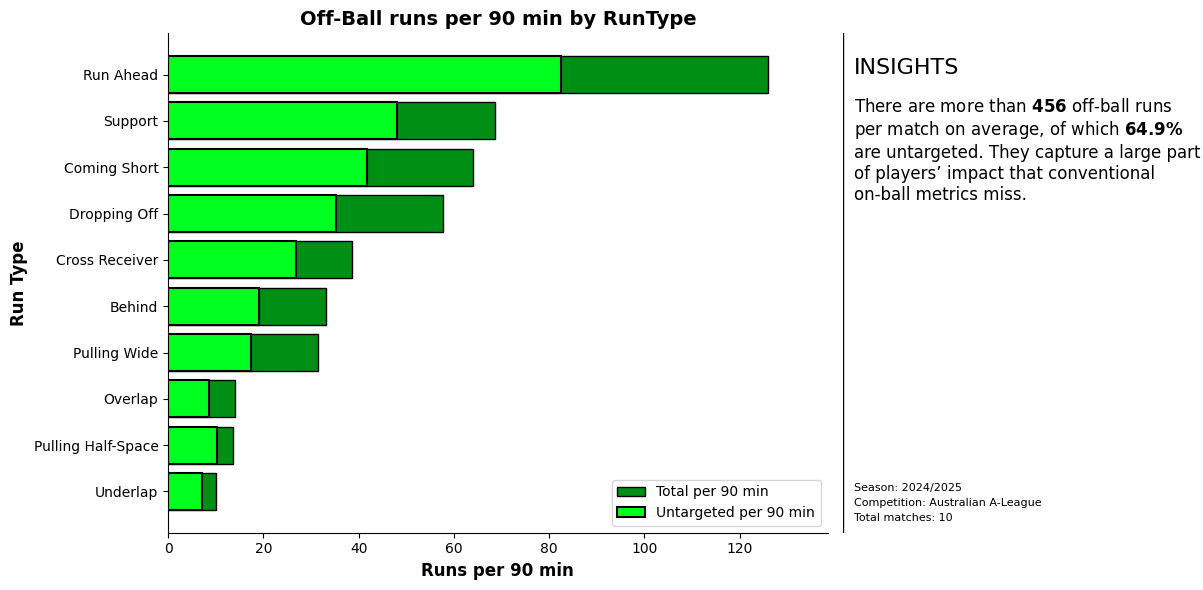

In [4]:
a_obr_per_subtype(all_tracking,dynamic_events_all)

Off-ball runs are not performed randomly, but are strongly influenced by the phase of play. Clear differences emerge between phases, indicating that certain movement patterns are more common in structured build-up situations, while others occur more frequently during transition or chaotic phases. This phase dependency suggests that off-ball runs are executed with **specific tactical intentions**, adapting to the available space and demands of each moment in the game.

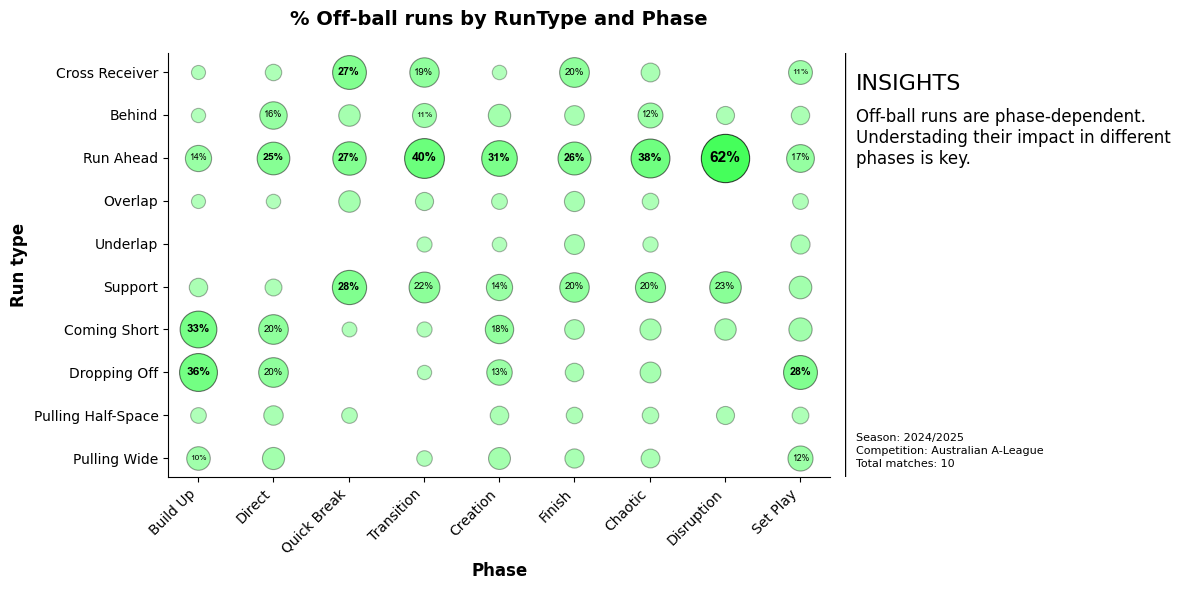

In [5]:
a_obr_per_subtype_per_phase(dynamic_events_all)

By comparing teams and players based on the distribution of off-ball runs across different run types, it is possible to identify distinct movement profiles and playing styles. These comparisons highlight differences in how teams and players use off-ball movement, making them useful for tactical analysis and player evaluation.

However, the number of runs alone is not sufficient to fully describe off-ball contribution. A high run volume does not necessarily imply that these movements are effective or add value to the team. To properly assess off-ball performance, it is therefore necessary to move beyond quantity and evaluate the **quality** of runs and their impact on the game.

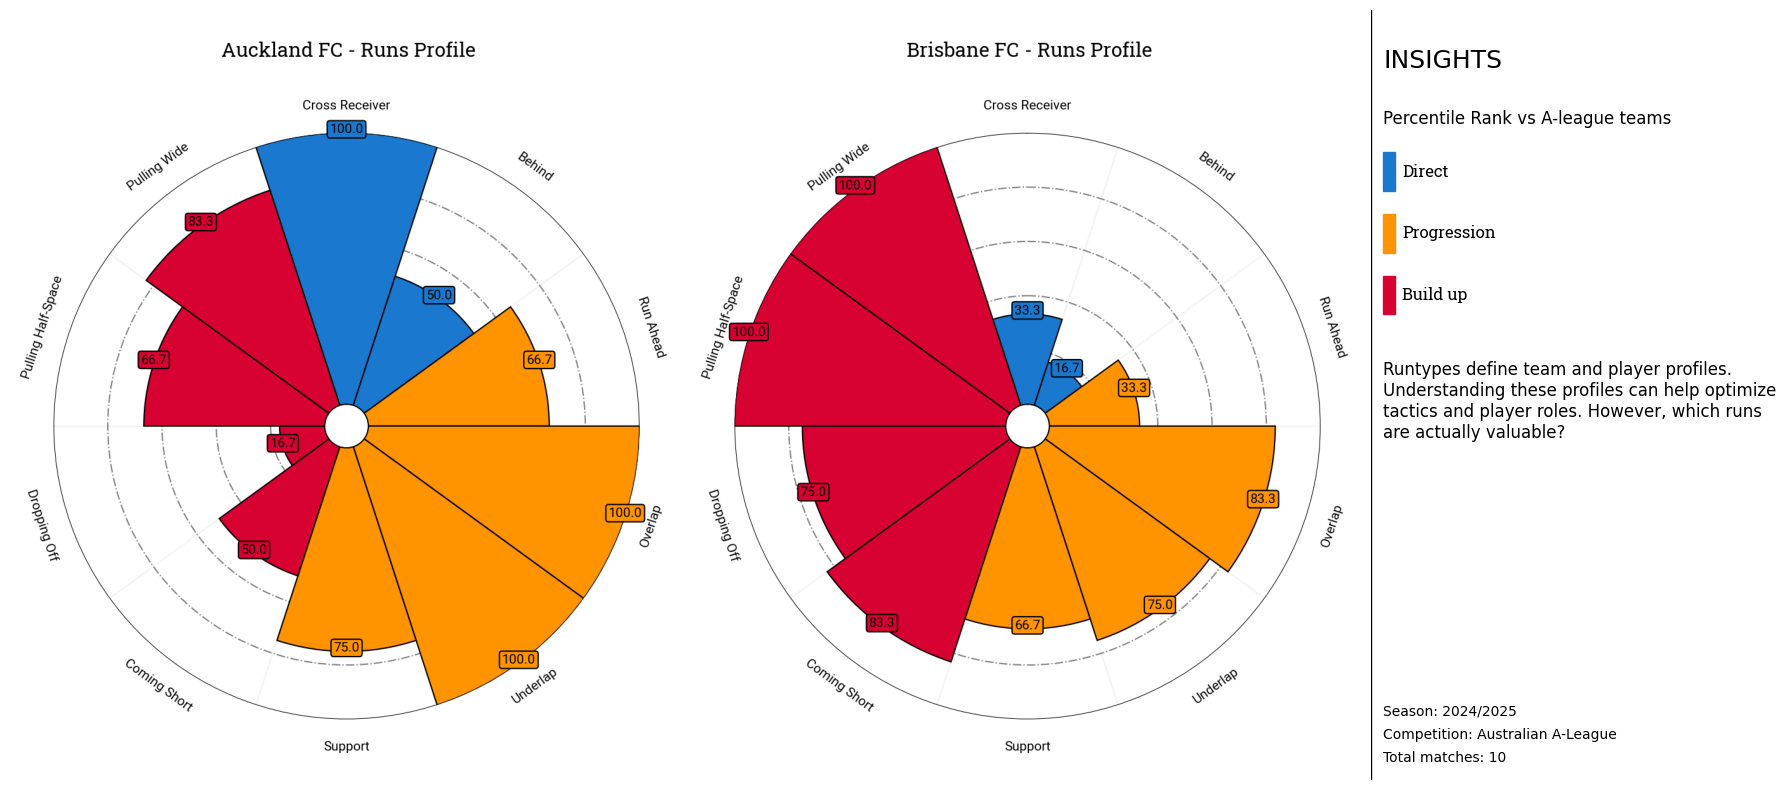

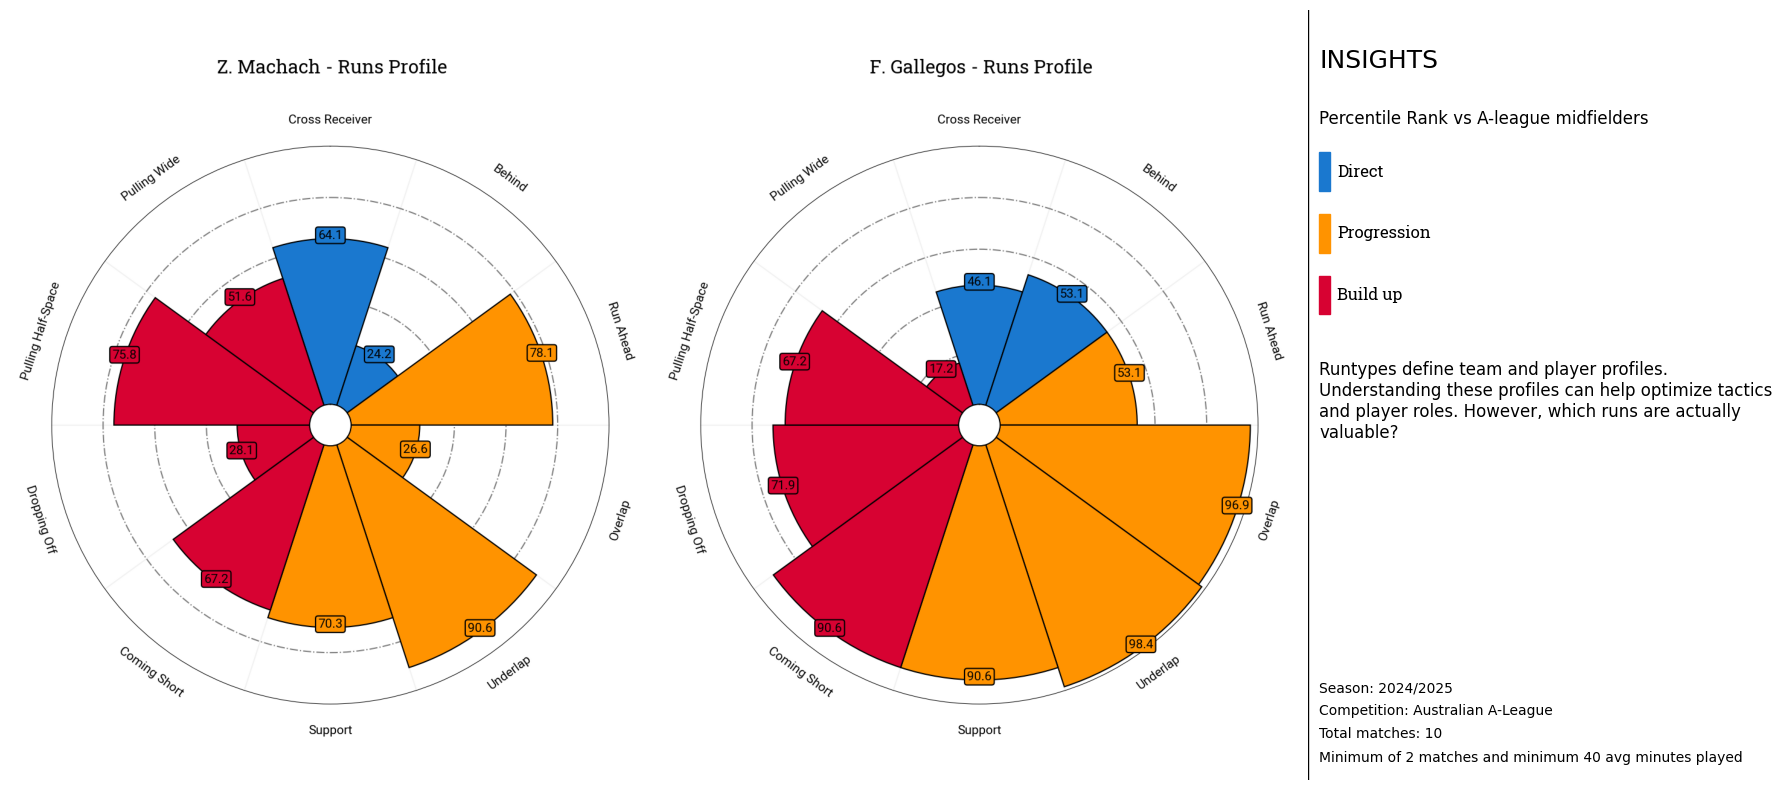

In [6]:
a_obr_per_subtype_per_team(all_tracking, dynamic_events_all, teams_shortnames=["Auckland FC", "Brisbane FC"])
a_obr_per_subtype_per_player(all_metadata, dynamic_events_all, players_names = ["Z. Machach", "F. Gallegos"], min_matches=2, min_avg_minutes_played=40)


**Midfielders** rank second in how evenly their off‑ball runs are spread across different run types while still accounting for a substantial share of all runs. Combined with the available physical aggregation data for this position group, this makes midfielders a choice for an analysis of their off‑ball movement.

Off-ball runs are primarily executed to get free and receive the ball in advantageous positions. These movements are crucial for maintaining ball circulation, progressing play, and creating scoring opportunities. The **defensive density change** metric builds on this principle, evaluating not just the frequency of runs but the value they add in terms of space creation and attacking potential.

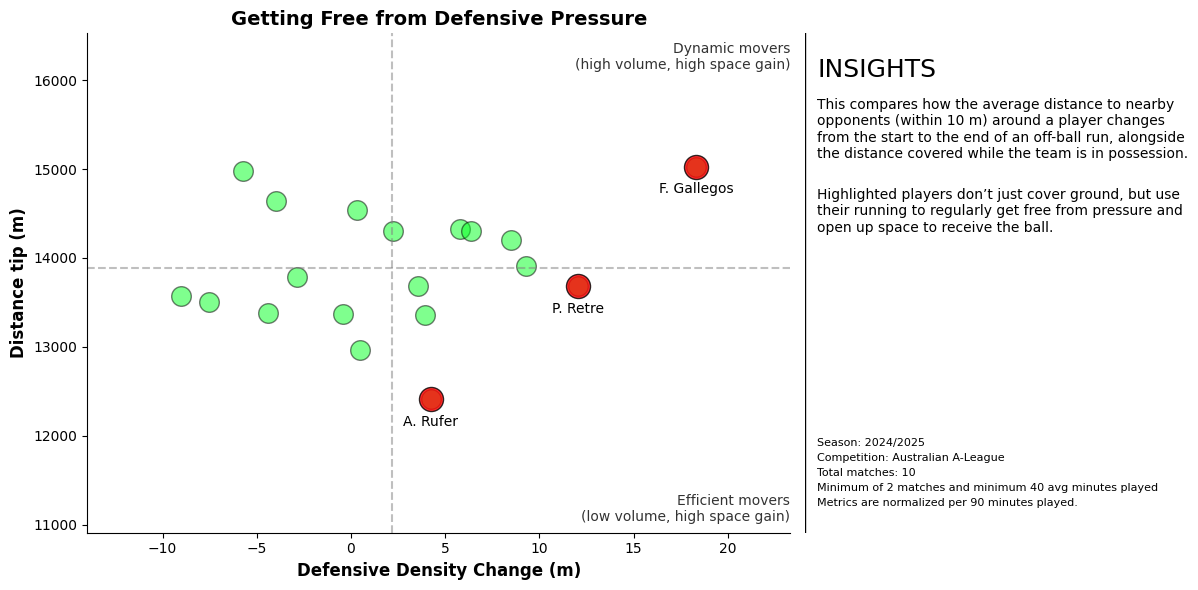

In [ ]:
a_ddc_distance_player(dynamic_events_all, all_tracking, all_metadata, data_path, min_matches=2, min_avg_minutes_played=40)

Previously, it was discussed how off-ball runs help a player get free to receive the ball in advantageous positions. Now the **space created** metric extends this idea by measuring the space a player generates for teammates through their movement. It compares the player’s Voronoi area at the start of the run with the average area in a short window around the end of the run (±5 frames). This captures how the player’s movement opens opportunities for others, also facilitating ball circulation, advancing play, and adding value to the attack.

The space created metric is applied only to build-up runs because it measures how much extra room is left in the original lane after the runner moves. For direct and progression runs, the important space is where the runner arrives rather than what they leave behind, so this definition would be misleading for those run types.

In [ ]:
a_space_created(dynamic_events_all, all_metadata, all_tracking, "1_91", min_matches=2, min_avg_minutes_played=40,csv_path=r"src\data\precomputed\space_creation_events.csv")

The **xThreatper90min** metric captures the impact of off-ball runs on attacking potential. While previous metrics measure movement or space creation, xThreat shows how these actions translate into dangerous situations. The focus is on direct and progression runs because these types of movement have the most immediate impact on advancing the ball and creating scoring opportunities.

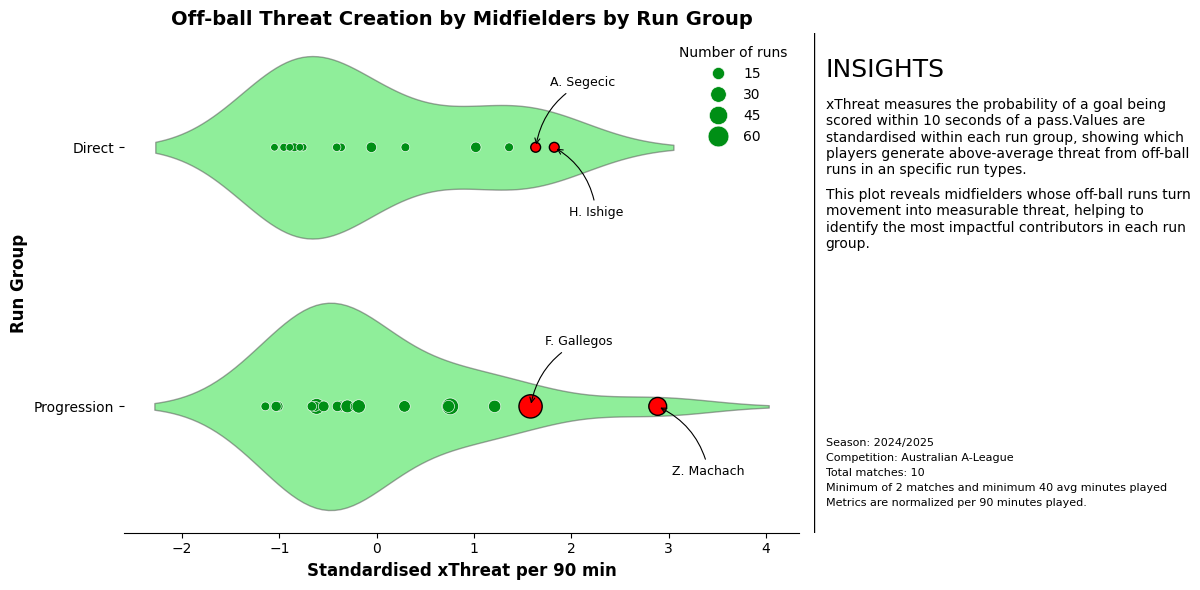

In [ ]:
a_xthreat_per_run_group(dynamic_events_all, all_metadata, min_matches=2, min_avg_minutes_played=40)

Building on the earlier player profiling based on run quantity, this analysis uses the newly created metrics to evaluate the quality of off-ball runs. By combining these measures, it is possible to generate a comprehensive view of a player’s effectiveness. This approach highlights not just how often a player moves, but how valuable their movements are for the team, providing insights for scouting, tactical analysis, and performance evaluation.

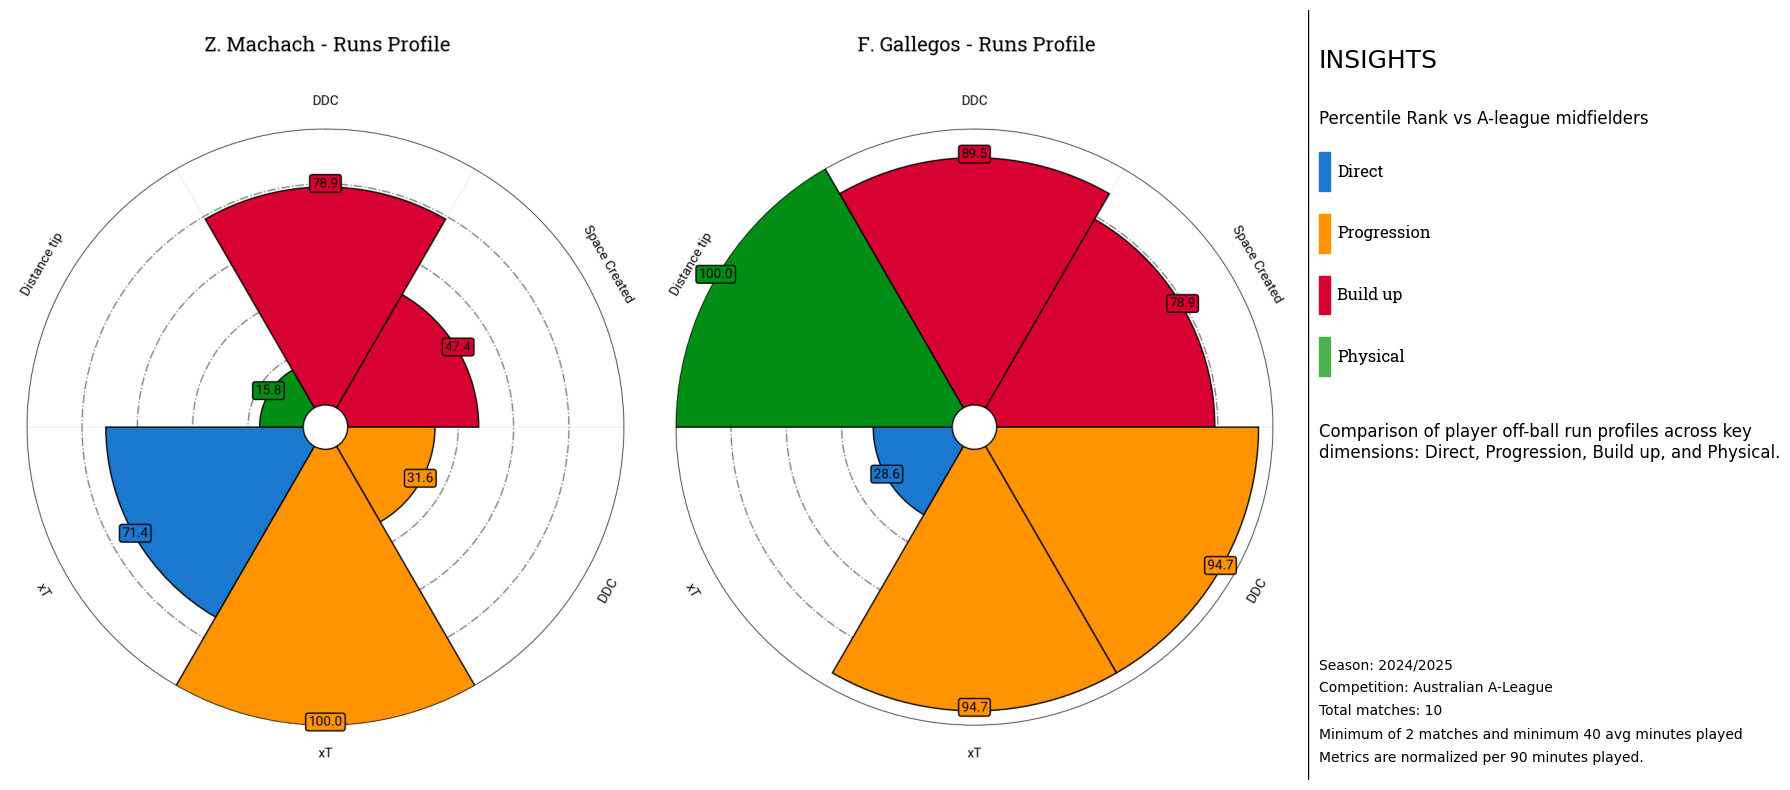

In [ ]:
a_obr_new_profiles(dynamic_events_all, all_metadata, all_tracking, data_path, min_matches=2, min_avg_minutes_played=40, players_names=["Z. Machach", "F. Gallegos"], csv_path=r"src\data\precomputed\overall_profile_df.csv")